# **Machine Problem \#1: *Affine Transformations***

Names: Cisneros, John Maverick; Paule, Mikael Angelo; Ramos, Rafael Anton; Santos, Andrea Li

## **Introduction**

This machine problem focuses on applying affine transformations, a type of geometric transformation to a given set of images. Affine transformations are widely used in image processing and computer vision tasks due to their ability to transform an image while maintaining the parallelism of lines and consistent ratios of areas, which are important for many practical applications.

For DIGIMAP's Machine Problem #1, the task was to reshape and augment the images through a series of parameterized affine transformations functions, such as resizing, random black patching, shifting, rotating, and flipping. At the end of this Jupyter notebook, the original dataset is enhanced with at least 100 images, including both the original and newly augmented ones.

## **Pre-requisites**

### **Dependencies**

The project relies on several key modules and libraries, each serving a specific role in the image processing and interactive functionalities:

1. [OS Module](https://docs.python.org/3/library/os.html): This module is part of Python's standard library and is responsible for interacting with the operating system. In this project, it handles file system operations such as defining the paths for both input and output directories. Additionally, it ensures the output directory exists, preventing potential errors when saving modified images.

2. [OpenCV (cv2) Library](https://pypi.org/project/opencv-python/): OpenCV is a powerful third-party library designed for real-time computer vision (cv) tasks. In this project, the cv2 module is used for a image processing tasks and image manipulation operations such as, reading and saving images, resizing, rotating, flipping, and applying transformations.

3. [Random Module](https://docs.python.org/3/library/random.html): This Python standard library module is used to generate pseudo-random numbers. In the project, it is primarily used within the black patch function to randomize the locations, sizes, and shapes of the black patches.

4. [Math Module](https://docs.python.org/3/library/math.html): Another module from the Python standard library, math provides access to basic mathematical functions. In the project, it is used to perform mathematical operations such as calculating the square root, particularly when determining the dimensions of randomly placed black patches.

5. [NumPy Library](https://numpy.org): NumPy is a third-party library widely used for numerical computing in Python. It provides powerful tools for array manipulation and matrix operations. In this project, NumPy is used for multiple data augmentation functions, especially when performing matrix-based operations is necessary.

6. [Matplotlib Library](https://matplotlib.org):  Matplotlib is a third-party library for for creating static and interactive displays in Python. The pyplot module within Matplotlib is used in this project to display images side by side, allowing the visualization of both the original and modified images before further processing or saving   .

7. [IPywidgets Library](https://pypi.org/project/ipywidgets/): IPywidgets is a third-party library that integrates with Jupyter notebooks to create interactive widgets like sliders. In this project, it is used to create real-time interactive controls for image augmentation functions to allow adjustments and immediate visualization of image transformations, making the notebook more interactive.

In [1]:
# !pip install opencv-python numpy matplotlib ipywidgets

In [2]:
import os
import cv2 as cv
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, fixed

### **Directory Setup**

In [3]:
# The current working directory to gauge the reference point for other paths to be accessed.
base_dir = os.getcwd()
# The directory where the dataset of images to be augmented is stored.
dataset_dir = os.path.join(base_dir, 'dataset')
# The directory where the augmented dataset will be stored.
output_dir = os.path.join(base_dir, 'MP1_augmented_dataset')

# If the output directory does not exist, it is created automatically
os.makedirs(output_dir, exist_ok=True)

# a sample image to be used for interactive visualization
image_path = os.path.join('dataset', '0001.jpg')

## **Helper Functions**

### **Display Image Function**
The `display_images` function displays two images, the original and modified images, side by side using pyplot from Matplotlib. It allows you to specify custom titles for the modified images and choose whether to show or hide the axes through the parameters. The images are displayed in RGB format, and the layout is adjusted using tight_layout() to ensure both images fit well on the screen.

In [4]:
def display_images(original_img, reshaped_img, modified_title, show_axis=False):
    """
    Displays two images side by side using Matplotlib.

    Args:
        original_img (np.ndarray): The original image.
        reshaped_img (np.ndarray): The image after transformation.
        reshaped_title (str): Title of the modified image display. 
        show_axis (bool): Flag to show or hide axis labels. Defaults to False.
    """
    plt.figure(figsize=(10, 5))  

    # Display the original image with additional styling
    plt.subplot(1, 2, 1)  
    plt.imshow(cv.cvtColor(original_img, cv.COLOR_BGR2RGB))
    plt.title("Original Image", fontsize=16, color='#D1768F')
    if not show_axis:
        plt.axis('off')

    # Display the modified image with additional styling
    plt.subplot(1, 2, 2)  
    plt.imshow(cv.cvtColor(reshaped_img, cv.COLOR_BGR2RGB))
    plt.title(modified_title, fontsize=16, color='#D1768F')
    if not show_axis:
        plt.axis('off')

    plt.tight_layout()  
    plt.show()

### **Save Image Function**
The `save_image` helper function simply saves an image to the output_dir using OpenCV's cv.imwrite(). The filename is passed as an argument, and the image is saved as a JPEG by default.

In [5]:
def save_image(img, filename):
    """
    Saves an image to the output directory.

    Args:
        img (np.ndarray): The image to be saved.
        filename (str): The filename under which the image will be saved in the output directory.
    """
    output_path = os.path.join(output_dir, filename)
    cv.imwrite(output_path, img)

## **Data Formatting Functions**

### **Reshape**

The reshape_image function is used to adjust the size of an image by changing both its width and height dimensions to a specified value, like 100 by 100 pixels for instance; this modification affects the images proportions and clarity of detail to some extent without altering its appearance.The primary purpose of using this function is to modify the images resolution, for needs including reducing file size or fitting it into layouts while maintaining its visual integrity.

In [6]:
def reshape_image(img, new_width, new_height):
    """
    Resizes the input image to the specified width and height.

    Args:
        img (numpy.ndarray): The input image to be reshaped, represented as a NumPy array.
        new_width (int): The desired width of the reshaped image.
        new_height (int): The desired height of the reshaped image.

    Returns:
        numpy.ndarray: The reshaped image with the new dimensions.
    """
    return cv.resize(img, (new_width, new_height))

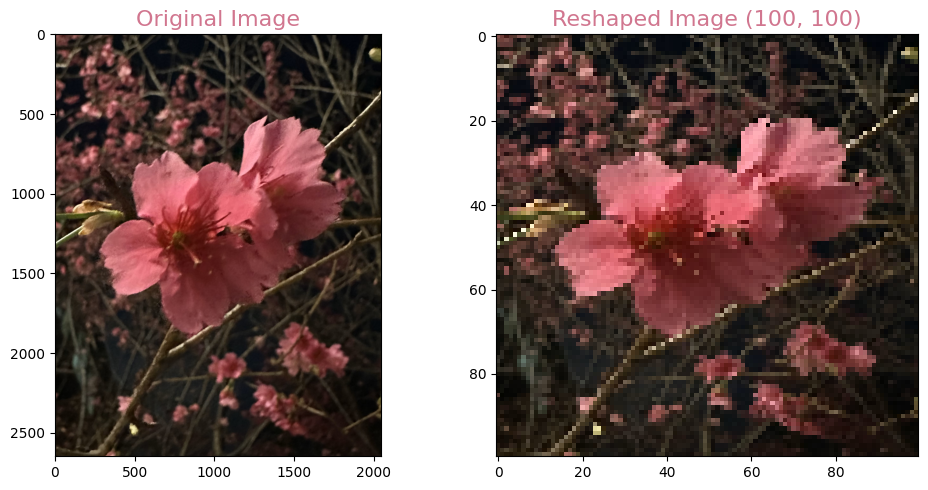

In [7]:
img = cv.imread(image_path)
reshaped_img = reshape_image(img, 100, 100)
display_images(img, reshaped_img, f"Reshaped Image (100, 100)", show_axis=True)

In [8]:
def interactive_reshape(image_path, new_width, new_height, show_axis=False):
    img = cv.imread(image_path)
    if img is None:
        print("Error: Could not read image")
        return
    
    reshaped_img = reshape_image(img, new_width, new_height)
    display_images(img, reshaped_img, f"Reshaped Image ({new_width}, {new_height})", show_axis)

slider_style = {'description_width': 'initial', 'handle_color': '#D1768F'}

interact(
    interactive_reshape,
    image_path=fixed(image_path),
    new_width=IntSlider(value=100, min=50, max=500, step=10, description='Width', style=slider_style),
    new_height=IntSlider(value=100, min=50, max=500, step=10, description='Height', style=slider_style),
    show_axis=fixed(True)
)

interactive(children=(IntSlider(value=100, description='Width', max=500, min=50, step=10, style=SliderStyle(de…

<function __main__.interactive_reshape(image_path, new_width, new_height, show_axis=False)>

## **Parameterized Data Augmentation Functions**

### **Black Patch**

The function black_patch is created to add black patches of varying sizes and positions to an image being processed to simulate the effect of erasing parts of the image by replacing specific rectangular regions with a consistent color that reflects the average pixel value, across the RGB channels of the image. This method can be beneficial for tasks such as data augmentation, in machine learning scenarios wherein the system is trained to adapt when certain areas of the image are masked or hidden. 

In [9]:
def black_patch(img, num_patch=1):
    """
    Applies a black patch to random locations on the input image.

    Args:
        img (numpy.ndarray): The input image represented as a NumPy array.
        num_patch (int, optional): The number of black patches to apply. Defaults to 1.

    Returns:
        numpy.ndarray: The modified image with black patches applied.
    """

    img = img.copy()
    h, w = img.shape[:2]
    mean = [0.4914, 0.4822, 0.4465]
    sl = 0.02
    sh = 0.4
    r1 = 0.3

    for _ in range(num_patch):
        for attempt in range(100):
            area = h * w
            target_area = random.uniform(sl, sh) * area
            aspect_ratio = random.uniform(r1, 1/r1)
            patch_h = int(round(math.sqrt(target_area * aspect_ratio)))
            patch_w = int(round(math.sqrt(target_area / aspect_ratio)))
            if patch_w < w and patch_h < h:
                x1 = random.randint(0, h - patch_h)
                y1 = random.randint(0, w - patch_w)
                img[x1:x1 + patch_h, y1:y1 + patch_w, 0] = mean[0]
                img[x1:x1 + patch_h, y1:y1 + patch_w, 1] = mean[1]
                img[x1:x1 + patch_h, y1:y1 + patch_w, 2] = mean[2]
                break
    return img


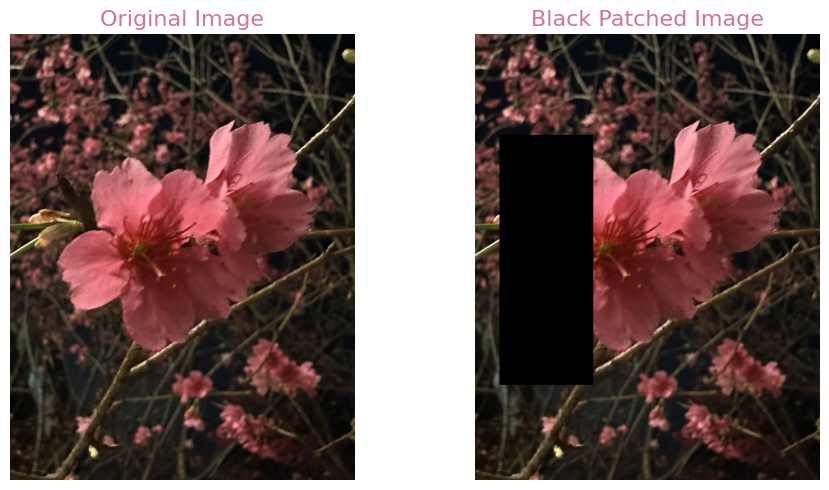

In [10]:
patched_img = black_patch(img, 1)
display_images(img, patched_img, "Black Patched Image", show_axis=False)

In [11]:
def interactive_black_patch(image_path, num_patch):
    img = cv.imread(image_path)
    if img is None:
        print("Error: Could not read image")
        return 
    modified_img = black_patch(img, num_patch=num_patch)

    display_images(img, modified_img, "Black Patched Image", show_axis=False)

interact(
    interactive_black_patch,
    image_path=fixed(image_path),
    num_patch=IntSlider(value=1, min=1, max=10, step=1, description='Num Erases', style=slider_style)
)

interactive(children=(IntSlider(value=1, description='Num Erases', max=10, min=1, style=SliderStyle(descriptio…

<function __main__.interactive_black_patch(image_path, num_patch)>

### **Shift**
Shifting an image means moving its pixels horizontally, vertically, or both. This makes the image appear repositioned within its original frame. For example, shifting an image 50 pixels to the right moves all the content rightward by 50 pixels, leaving empty space on the left edge, while having the right most content dissapear.

The shift_image function takes an image and shifts its pixels by a specified amount horizontally (x_shift) and vertically (y_shift). This results in an output image where the content is moved accordingly. The function uses an affine transformation to perform this shift, returning a new image with the same dimensions as the original.

In [12]:
def shift_image(img, x_shift, y_shift):
    """
    Shifts an image by a specified number of pixels in the x and y directions.
    
    Parameters:
    img (numpy.ndarray): The input image to be shifted.
    x_shift (int): The number of pixels to shift the image horizontally.
    y_shift (int): The number of pixels to shift the image vertically.
    
    Returns:
    numpy.ndarray: The shifted image with the same dimensions as the input image.
    """
    h, w = img.shape[:2]
    M = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    shifted_img = cv.warpAffine(img, M, (w, h))
    return shifted_img

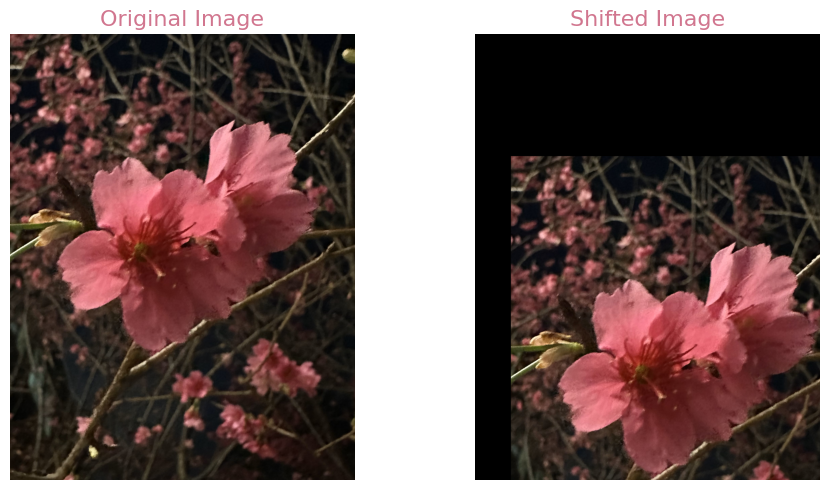

In [13]:
"an example of a shifted image given a static input"
shifted_img = shift_image(img, 213, 725)
display_images(img, shifted_img, "Shifted Image", show_axis=False)

In [14]:
def interactive_shift(image_path, x_shift, y_shift):
    """
    This function allows the use of the shift_image function to be
    interactive by adding sliders to change the x and y value
    
    Parameters:
    image_path (str): The path to the image file to be read and shifted.
    x_shift (int): The number of pixels to shift the image horizontally.
    y_shift (int): The number of pixels to shift the image vertically.
    
    Returns:
    The function will print an error message and return if the specified image 
    cannot be read. Otherwise, this function instead does not return a value; 
    it only displays the original and shifted images.
    """
    img = cv.imread(image_path)
    if img is None:
        print("Error: Could not read image")
        return
    modified_img = shift_image(img, x_shift, y_shift)
    display_images(img, modified_img, "Shifted Image", show_axis=False)

interact(
    interactive_shift,
    image_path=fixed(image_path),
    x_shift=IntSlider(value=213, min=-1000, max=1000, step=1, description='X Shift', style=slider_style),
    y_shift=IntSlider(value=725, min=-1000, max=1000, step=1, description='Y Shift', style=slider_style)
)

interactive(children=(IntSlider(value=213, description='X Shift', max=1000, min=-1000, style=SliderStyle(descr…

<function __main__.interactive_shift(image_path, x_shift, y_shift)>

### **Rotation**
Rotating an image means turning it around a specified center point by a certain angle. This transformation alters the orientation or the tilt of the image. For example, rotating an image 90 degrees counter-clockwise repositions all content to the left, potentially causing parts of the image to extend beyond the original frame.

The rotate_image function takes an image and rotates its pixels around the center by a specified angle. This results in a new image where the content is oriented according to the rotation. The function uses a rotation matrix to perform this transformation, returning a new image that maintains the same dimensions as the original.

In [15]:
def rotate_image(img, angle):
    """
    Rotates an image around its center by a specified angle.
    
    Parameters:
    img (numpy.ndarray): The input image to be rotated.
    angle (float): The angle of rotation in degrees. Positive values rotate counter-clockwise, and negative values rotate clockwise.
    
    Returns:
    numpy.ndarray: The rotated image with the same dimensions as the input image.
    """
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv.warpAffine(img, M, (w, h))
    return rotated_img

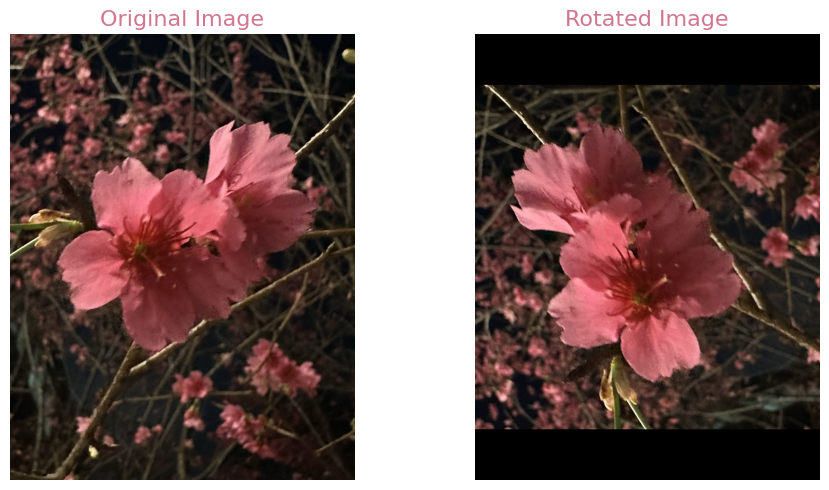

In [16]:
"an example of a rotated image given a static input"
rotated_img = rotate_image(img, 90)
display_images(img, rotated_img, "Rotated Image", show_axis=False)

In [17]:
def interactive_rotation(image_path, angle):
    """
    This function allows the use of the rotate_image function to be
    interactive by adding sliders to change the rotation angle.
    
    Parameters:
    image_path (str): The path to the image file to be read and rotated.
    angle (int): The angle in degrees to rotate the image. Positive values rotate counter-clockwise.
    
    Returns:
    If the specified image cannot be read, the function will print an error message and exit.
    Otherwise, this function does not return a value; it only displays the original and rotated images.
    """
    img = cv.imread(image_path)
    if img is None:
        print("Error: Could not read image")
        return
    modified_img = rotate_image(img, angle)
    display_images(img, modified_img, "Rotated Image", show_axis=False)

interact(
    interactive_rotation,
    image_path=fixed(image_path),
    angle=IntSlider(value=213, min=0, max=360, step=1, description='Rotation Angle', style=slider_style)
)

interactive(children=(IntSlider(value=213, description='Rotation Angle', max=360, style=SliderStyle(descriptio…

<function __main__.interactive_rotation(image_path, angle)>

### **Flip**
This function takes an input image and flips it based on the direction specified by the provided flip_code. The flip operation mirrors the image along one or more axes, resulting in the image being reflected either horizontally, vertically, or both.

In [18]:
def flip_image(img, flip_code):
    """
    Parameters:
    img (numpy.ndarray): The input image to be flipped.
    flip_code (int): The code that defines the axis of flipping:
        0  -> Flips the image vertically.
        1  -> Flips the image horizontally.
        -1 -> Flips the image both vertically and horizontally.

    Returns:
    numpy.ndarray: The flipped image.
    """
    flipped_img = cv.flip(img, flip_code)
    return flipped_img

flipped_img = flip_image(img, 1)

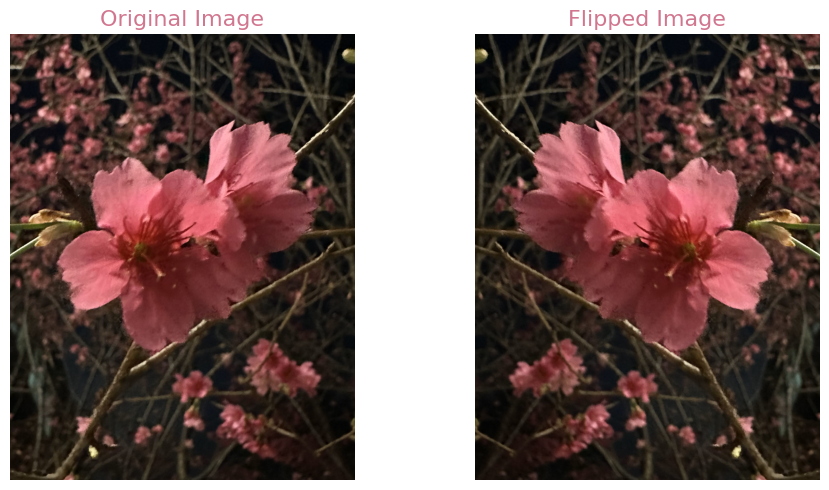

'\ndisplay_images(img1, img2, title, show_axis)\nThis function displays two images side by side using matplotlib.\n\nParameters:\n    img1 (numpy.ndarray): The first image to be displayed.\n    img2 (numpy.ndarray): The second image to be displayed.\n    title (str): The title for the display window.\n    show_axis (bool): If False, the axis is hidden in the display.\n'

In [19]:
display_images(img, flipped_img, "Flipped Image", show_axis=False)

In [20]:
def interactive_flip(image_path, flip_code):
    """
    interactive_flip(image_path, flip_code)
    This function is designed to allow interaction with the image flipping process via a slider.

    Parameters:
    image_path (str): Path to the image to be flipped.
    flip_code (int): The code to determine how the image should be flipped (-1, 0, or 1).
    """
    img = cv.imread(image_path)
    if img is None:
        print("Error: Could not read image")
        return
    modified_img = flip_image(img, flip_code)
    display_images(img, modified_img, "Flipped Image", show_axis=False)

interact(
    interactive_flip,
    image_path=fixed(image_path),
    flip_code=IntSlider(value=1, min=-1, max=1, step=1, description='Flip Code', style=slider_style)
)

interactive(children=(IntSlider(value=1, description='Flip Code', max=1, min=-1, style=SliderStyle(description…

<function __main__.interactive_flip(image_path, flip_code)>

## **Producing a New Augmented Dataset**
The apply_and_save_augmentation function is designed to apply a given augmentation function to an image, then save the resulting augmented image with a new, descriptive file name.

In [21]:
def apply_and_save_augmentation(img, original_name, function_name, augment_func):
    """
    img : numpy.ndarray
        The original image represented as a NumPy array (typically loaded using OpenCV or other image libraries).
        
    original_name : str
        The base name of the original image file. This is used to generate a new name for the augmented image.
        
    function_name : str
        The name of the augmentation function being applied (e.g., "flip", "rotate", "noise"). 
        This will be included in the new file name to indicate what transformation has been applied.
        
    augment_func : function
        A function that performs the desired augmentation on the image. This function should accept an image 
        as an input and return the augmented version of the image.
    
    Returns:
    -------
    None
        The function saves the augmented image to disk with the new name but does not return any value.
    """
    augmented_img = augment_func(img)
    new_name = f"{function_name}_{original_name}"
    save_image(augmented_img, new_name)

### **Processing Images**
The process_images function is designed to process and augment images from a directory. It performs a series of transformations (augmentations) on each image and saves the results.

In [22]:
def process_images(dataset_dir):
    count = 0
    target_size = (100, 100)

    for filename in os.listdir(dataset_dir):
        if filename.endswith('.jpg'):
            img_path = os.path.join(dataset_dir, filename)
            img = cv.imread(img_path)

            reshaped_img = reshape_image(img, target_size[0], target_size[1])
            reshaped_name = f"reshaped_{filename}"
            save_image(reshaped_img, reshaped_name)
            count += 1

            apply_and_save_augmentation(img, filename, 'black_patched', lambda img: black_patch(img))
            apply_and_save_augmentation(img, filename, 'shifted', lambda img: shift_image(img, 213, 725))

            apply_and_save_augmentation(img, filename, 'rotated_45', lambda img: rotate_image(img, 45))
            apply_and_save_augmentation(img, filename, 'rotated_90', lambda img: rotate_image(img, 90))
            apply_and_save_augmentation(img, filename, 'rotated_180', lambda img: rotate_image(img, 180))
            apply_and_save_augmentation(img, filename, 'rotated_270', lambda img: rotate_image(img, 270))

            apply_and_save_augmentation(img, filename, 'flipped_horizontal', lambda img: flip_image(img, 1))
            apply_and_save_augmentation(img, filename, 'flipped_vertical', lambda img: flip_image(img, 0))
            apply_and_save_augmentation(img, filename, 'flipped_both', lambda img: flip_image(img, -1))

            count += 8  

            if count >= 100:
                break

#process_images(dataset_dir)

## **Guide Questions:**
### *Understanding Digital Image Processing*

It is important to understand the concepts of digital image processing, for tasks that utilize data enhancement methods like resizing and adjusting colors because it boosts the effectiveness and flexibility of models in recognizing patterns under conditions, in real world situations where images may not be perfectly aligned or centered all the time. Methods such, as patch application are crucial to make sure that models pay attention to features and do not overly depend on certain sections of an image. Moreover adjustments made to images during preprocessing by resizing them guarantee input dimensions leading to enhanced processing speed and minimized computational mistakes. In general digital image processing is key in developing robust and effective models for tasks, like image identification and other computer vision applications.

### *Data Augmentation and its Importance*

Data Augmentation is the process of applying various techniques that transforms or alter an existing data, through this, it serves as a very useful ability in simulating data without the hassle of needing to collect another data in the real world which also helps in staying at an original data.

The importance of Data Augmentation mainly comes from the convenience it brings on the data being studied upon, in most cases, researching on a data requires more than one data which is why gathering data to form datasets are necessary with Data Augmentation, the size of this datasets are greatly reduced into a better amount without having that much hassle. Lastly, Data Augmentation captures the alteration of the real world, even in conditions that are difficult, it's entirely possible through this process.
    
### *Other Data Augmentation Techniques*

Other data augmentation techniques that can be applied to the augmented dataset include cropping, image warping, color jittering, and grayscale conversion due to the fact the dataset consists of JPEG images resized to (100, 100, 3). This is a standard format that allows for a wide range of pixel-level manipulations. Cropping can be used because the JPEG format and pixel grid allow for slicing out sections of the image without affecting its overall data structure, making it easy to crop and reprocess. Image warping works because the pixel-based nature of the images allows for geometric transformations such as warping or stretching, which are simple to apply to 2D image arrays. Color jittering is applicable because each image consists of three color channels (RGB), and color transformations like adjusting brightness, contrast, or hue can easily be applied to these channels. And finally, grayscale conversion can be used because the dataset is in an RGB format, which can be reduced to a single intensity channel.

Due to the nature of the dataset being all jpgs, data augmentation techniques the focuses on different data types will not be applicable. Audio data augmentation techniques like changing the pitch and speed will not be applicable here, neither are text data augmentation techniques like word/sentence shuffling or syntax-tree manipulation.